# [Python для анализа данных](https://go.acstat.com/c479e51b17784f2f)

Научимся:

* Искать пропуски в данных и дубликаты
*  Агрегировать данные
*  Сортировать данные
*  Строить сводные таблицы (как в Excel 😏 )
* Объединять датафреймы
* Строить простые графики 




Найдем самых лояльных покупателей

Построим сводную таблицу по пользователям 

Разделим покупателей на когорты

*Посмотрим,как строится retention по когортам

 


In [ ]:
# импортируем нужные библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# читаем данные из csv, который находится в zip-файле на github
# с параметрами read_csv можно ознакомиться https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

url = 'https://github.com/obulygin/ds-intro/blob/master/ecommerce-data.zip?raw=true'
df = pd.read_csv(url, encoding='ISO-8859-1', compression='zip')

In [ ]:
# предназначен для просмотра первых n строк таблицы (по умолчанию n=5)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# смотрим последние 5 строк таблицы
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
# позволяет рассчитать базовые статистики по каждому числовому признаку
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# позволяет вывести общую информацию 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Избавимся от пропущенных значений

In [ ]:
# посчитаем, какой процент пропусков по каждому столбцу. Используем для этого цикл.
for column in df.columns:
    pct_missing = df[column].isnull().mean()
    print(f'{column} - {pct_missing :.1%}')

InvoiceNo - 0.0%
StockCode - 0.0%
Description - 0.3%
Quantity - 0.0%
InvoiceDate - 0.0%
UnitPrice - 0.0%
CustomerID - 24.9%
Country - 0.0%


In [ ]:
# отберем только строки, где ID покупателя отсутствует и отсортируем по цене
df[df.CustomerID.isnull()].sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
21782,538133,85018C,NaN,3,12/9/2010 15:56,0.00,NaN,United Kingdom
193187,553521,22692,DOORMAT WELCOME TO OUR HOME,1,5/17/2011 14:35,0.00,NaN,United Kingdom
193186,553521,48184,DOORMAT ENGLISH ROSE,1,5/17/2011 14:35,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:04,13541.33,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom


In [ ]:
# оставляем данные только с заполненным id пользователя  и ненулевыми ценами за товар
df = df[(df.CustomerID.notnull()) & (df.UnitPrice != 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# проверить, остались ли пропуски
df[df.CustomerID.isnull()].sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Избавимся от дубликатов в данных

In [ ]:
# посмотрим, сколько у нас повторов
df.duplicated().sum()

5225

In [ ]:
# сколько всего строк?
df.shape

(406789, 8)

In [ ]:
# удалим повторы
df.drop_duplicates(inplace=True)
df.shape

(401564, 8)

### Поправим типы данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401564 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401564 non-null  object 
 1   StockCode    401564 non-null  object 
 2   Description  401564 non-null  object 
 3   Quantity     401564 non-null  int64  
 4   InvoiceDate  401564 non-null  object 
 5   UnitPrice    401564 non-null  float64
 6   CustomerID   401564 non-null  float64
 7   Country      401564 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
df.CustomerID = df.CustomerID.astype('int64')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401564 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401564 non-null  object        
 1   StockCode    401564 non-null  object        
 2   Description  401564 non-null  object        
 3   Quantity     401564 non-null  int64         
 4   InvoiceDate  401564 non-null  datetime64[ns]
 5   UnitPrice    401564 non-null  float64       
 6   CustomerID   401564 non-null  int64         
 7   Country      401564 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


### Поизучаем статистику в разрезе стран

In [ ]:
# считаем сколько транзакций было по странам при помощи value_counts
df['Country'].value_counts()

United Kingdom          356704
Germany                   9478
France                    8474
EIRE                      7473
Spain                     2527
Netherlands               2367
Belgium                   2069
Switzerland               1876
Portugal                  1471
Australia                 1255
Norway                    1085
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45
Lithuani

In [ ]:
# считаем сколько уникальных пользователей в странах
# groupby работает аналогично операции GROUP BY в SQL и позволяет группировать данные, 
# вычисляя затем агрегированные показатели в каждой группе.
countries = df.groupby(by='Country').CustomerID.nunique().sort_values(ascending=False)
countries

Country
United Kingdom          3949
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Denmark                    9
Australia                  9
Netherlands                9
Cyprus                     8
Japan                      8
Sweden                     8
Poland                     6
Unspecified                4
Israel                     4
Greece                     4
USA                        4
Canada                     4
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Czech Republic             1
Singapore                  1
Lithuania                  1
Saudi Arabia               1
Brazil                     1
RSA                        1
Icelan

### Поизучаем показатели выручки

In [ ]:
# создадим новый столбец
df['Revenue'] = df['Quantity'] * df['UnitPrice']
# добавим месяц покупки в новый столбец при помощи dt.strftime('%Y - %m')
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m') 
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


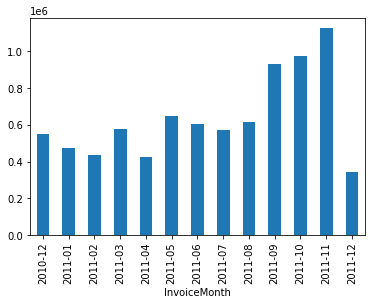

In [ ]:
# выручка по месяцам
df.groupby(['InvoiceMonth'])['Revenue'].sum().plot(kind='bar')

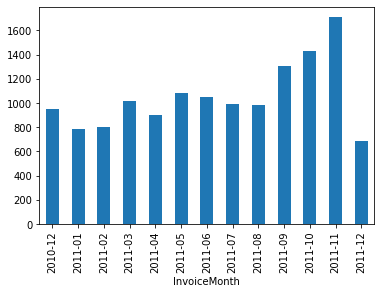

In [ ]:
# уникальные покупатели по месяцам
df.groupby(['InvoiceMonth'])['CustomerID'].nunique().plot(kind='bar')

In [ ]:
# сводная таблица по выручки в определенной стране в разрезе пользователей и месяцев
table = pd.pivot_table(
    df[df.Country=='Belgium'], 
    index='CustomerID', 
    columns='InvoiceMonth', 
    aggfunc=sum, 
    values='Revenue', 
    fill_value=0)


cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm)
# подсветить максимальные значения по каждому месяце
table.style.highlight_max(axis=1)

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12361,0.000000,0.000000,189.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12362,0.000000,0.000000,474.200000,0.000000,495.240000,0.000000,0.000000,303.760000,451.350000,829.990000,1641.910000,429.090000,529.040000
12364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,623.920000,79.800000,299.060000,0.000000,310.320000
12379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,459.840000,-1.950000,0.000000,392.400000,0.000000,0.000000,0.000000
12380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,607.550000,0.000000,0.000000,626.010000,446.610000,1040.390000,0.000000
12383,600.720000,639.910000,0.000000,357.070000,142.160000,0.000000,99.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,549.840000,0.000000,0.000000,0.000000
12394,0.000000,0.000000,0.000000,0.000000,0.000000,381.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12395,679.920000,-2.950000,216.660000,326.500000,0.000000,331.790000,163.900000,0.000000,165.950000,0.000000,346.680000,769.830000,0.000000


### Изучим статистику в разрезе клиентов

In [ ]:
# изучим сводную статистику по покупателям из произвольной страны
products = df[df.Country=='Belgium'].groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
products = products.groupby(by='CustomerID').agg({'InvoiceNo': ['count'], 'Revenue': ['sum','mean']})
products

InvoiceNo  Revenue             
               count      sum         mean
CustomerID                                
12361              1   189.90   189.900000
12362             13  5154.58   396.506154
12364              4  1313.10   328.275000
12379              3   850.29   283.430000
12380              5  2720.56   544.112000
12383              6  1839.31   306.551667
12390              1   549.84   549.840000
12394              1   381.08   381.080000
12395             15  2998.28   199.885333
12397              2  2409.90  1204.950000
12399              4  1108.65   277.162500
12401              1    84.30    84.300000
12402              1   225.60   225.600000
12407              5  1708.12   341.624000
12408              9  2842.57   315.841111
12417             11  3142.50   285.681818
12423              9  1849.11   205.456667
12431              2   972.78   486.390000
12447              1   476.49   476.490000
12449              4  4067.29  1016.822500
12463              7  1303.63   186.232857
12464              8  1212.05   151.506250
12465              3   733.89   244.630000
12866              1   559.12   559.120000
12876              2  2218.02  1109.010000

In [ ]:
# объединяем статистику по месяцам и статистику по выручки и количеству заказов в разрезе пользователей
table_plus = pd.merge(table, products,  on='CustomerID')  
table_plus.style.background_gradient(cmap=cm)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,"('InvoiceNo', 'count')","('Revenue', 'sum')","('Revenue', 'mean')"
CustomerID,,,,,,,,,,,,,,,,
12361,0.000000,0.000000,189.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,189.900000,189.900000
12362,0.000000,0.000000,474.200000,0.000000,495.240000,0.000000,0.000000,303.760000,451.350000,829.990000,1641.910000,429.090000,529.040000,13,5154.580000,396.506154
12364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,623.920000,79.800000,299.060000,0.000000,310.320000,4,1313.100000,328.275000
12379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,459.840000,-1.950000,0.000000,392.400000,0.000000,0.000000,0.000000,3,850.290000,283.430000
12380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,607.550000,0.000000,0.000000,626.010000,446.610000,1040.390000,0.000000,5,2720.560000,544.112000
12383,600.720000,639.910000,0.000000,357.070000,142.160000,0.000000,99.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,1839.310000,306.551667
12390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,549.840000,0.000000,0.000000,0.000000,1,549.840000,549.840000
12394,0.000000,0.000000,0.000000,0.000000,0.000000,381.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,381.080000,381.080000
12395,679.920000,-2.950000,216.660000,326.500000,0.000000,331.790000,163.900000,0.000000,165.950000,0.000000,346.680000,769.830000,0.000000,15,2998.280000,199.885333


**Топ-5 лояльных покупателей**

In [ ]:
# не будем учитывать количества < 0
frequency_df = df[df.Quantity > 0].copy()
# посчитаем количество транзакций в разрезе покупателей
frequency_df = frequency_df.groupby('CustomerID')['InvoiceNo'].nunique()
# отсортируем данные
frequency_df.sort_values(ascending=False, inplace=True)
frequency_df.head(5)

CustomerID
12748    209
14911    201
17841    124
13089     97
14606     93
Name: InvoiceNo, dtype: int64

### Как меняется средний чек со временем?

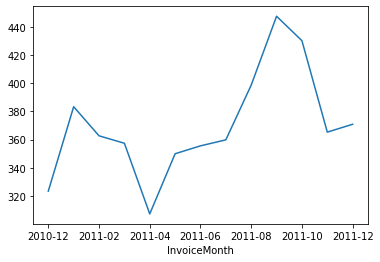

In [ ]:
aov = df.groupby(df['InvoiceMonth'])['Revenue'].sum().divide(df.groupby(df['InvoiceMonth'])['InvoiceNo'].nunique())
aov.plot()

## Сегменты товаров по стоимости

In [ ]:
# напишем функцию для сегментации товаров
def price_segment(row):
    if row < 5:
        return 'cheap' 
    if row >= 5 and row < 100:
        return 'middle'
    if row >= 100:
        return 'expensive'
 

df['PriceSegment'] = df[df.Quantity > 0]['UnitPrice'].apply(price_segment)
# df.groupby('PriceSegment')['StockCode'].nunique()
df.groupby('PriceSegment')['StockCode'].count()

PriceSegment
cheap        341947
expensive       189
middle        50556
Name: StockCode, dtype: int64

**Когортный анализ**

In [ ]:
# определяем месяц первой покупки для каждого покупателя 
cohorts = df.groupby('CustomerID', as_index=False)['InvoiceMonth'].min()
cohorts.rename(columns = {'InvoiceMonth':'Cohort'}, inplace=True)
cohorts.head()

,CustomerID,Cohort
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02


In [ ]:
# добавим когорты к основным данным
df_merged = pd.merge(df, cohorts, how='left', on='CustomerID')
df_merged.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,PriceSegment,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,cheap,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,cheap,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,cheap,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,cheap,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,cheap,2010-12


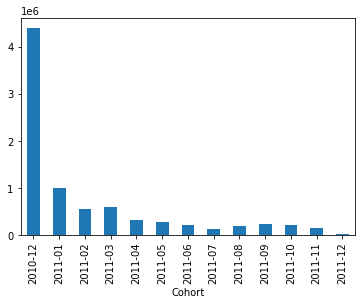

In [ ]:
# визуализиоуем доходы по когортам
df_merged.groupby(['Cohort'])['Revenue'].sum().plot(kind='bar') 

## Retention. Как долго мы удерживаем каждого покупателя?

In [ ]:
import numpy as np

# пишем функцию которая добавляет столбец с номером каждой когорты
def cohort_period(df):
  df['CohortPeriod'] = np.arange(len(df))
  return df


cohorts = df_merged.groupby(['Cohort', 'InvoiceMonth']).agg({'CustomerID': pd.Series.nunique})
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.rename(columns={'CustomerID': 'TotalUsers'}, inplace=True)
cohorts

TotalUsers  CohortPeriod
Cohort  InvoiceMonth                          
2010-12 2010-12              948             0
        2011-01              362             1
        2011-02              317             2
        2011-03              367             3
        2011-04              341             4
...                          ...           ...
2011-10 2011-11               93             1
        2011-12               46             2
2011-11 2011-11              320             0
        2011-12               43             1
2011-12 2011-12               41             0

[91 rows x 2 columns]

In [ ]:
# переведем когорты в индекс, а дату чека в столбец
cohorts.reset_index(inplace=True)
cohorts.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohorts

InvoiceMonth  TotalUsers
Cohort  CohortPeriod                         
2010-12 0                 2010-12         948
        1                 2011-01         362
        2                 2011-02         317
        3                 2011-03         367
        4                 2011-04         341
...                           ...         ...
2011-10 1                 2011-11          93
        2                 2011-12          46
2011-11 0                 2011-11         320
        1                 2011-12          43
2011-12 0                 2011-12          41

[91 rows x 2 columns]

In [ ]:
# считаем ретеншн пользователей в каждой когорте

# определим количество покупок в первый месяц когорты (100%)
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()

# узнаем какой процент покупок этой когортой совершался в последующие месяца
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

Cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.381857,0.239905,0.247368,0.190909,0.227425,0.236559,0.208511,0.209424,0.251497,0.298658,0.264205,0.134375,NaN
2,0.334388,0.282660,0.192105,0.254545,0.220736,0.172043,0.187234,0.204188,0.251497,0.325503,0.130682,NaN,NaN
3,0.387131,0.242280,0.278947,0.218182,0.210702,0.172043,0.272340,0.230366,0.251497,0.120805,NaN,NaN,NaN
4,0.359705,0.327791,0.268421,0.231818,0.207358,0.215054,0.246809,0.272251,0.137725,NaN,NaN,NaN,NaN
5,0.396624,0.299287,0.247368,0.177273,0.237458,0.243728,0.336170,0.115183,NaN,NaN,NaN,NaN,NaN
6,0.379747,0.261283,0.255263,0.263636,0.230769,0.265233,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
7,0.354430,0.256532,0.281579,0.238636,0.260870,0.103943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.354430,0.311164,0.257895,0.288636,0.083612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


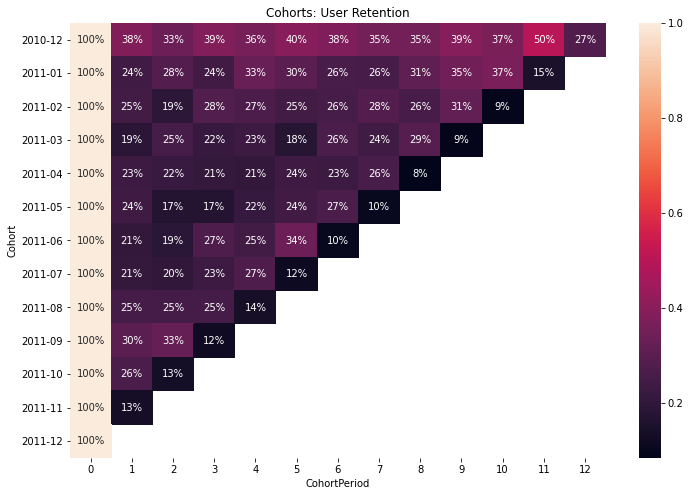

In [ ]:
# строим тепловую карту по ретеншн
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, annot=True, fmt='.0%')